In [ ]:
#@title Load Libraries
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2

# load data set

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
unlabeld_index = np.ones(y_train.shape, np.bool)

N = 20
for i in range(10):
  idx = np.where(y_train == i)[0][:N]
  unlabeld_index[idx] = 0

In [ ]:
x_unlabeld = x_train[np.where(unlabeld_index)[0], ...]

x_train = x_train[np.where(~unlabeld_index)[0], ...]
y_train = y_train[np.where(~unlabeld_index)[0], ...]

In [ ]:
print(len(x_unlabeld))
print(x_unlabeld.shape)

print(len(x_train))
print(len(y_train))

print(len(x_test))
print(len(y_test))

49800
(49800, 32, 32, 3)
200
200
10000
10000


# prepare training data

In [ ]:
import os
import cv2
from matplotlib import pyplot as plt


counter = 0
filenames = []
labels = []
Rlabels = []

!mkdir train
!mkdir train/train0
!mkdir train/train90
!mkdir train/train270
!mkdir train/train180
!mkdir train/unknown0
!mkdir train/unknown90
!mkdir train/unknown180
!mkdir train/unknown270

for cifar_class in range(10):
  for i in range (len(x_train)):
    if y_train[i] == cifar_class :
      cv2.imwrite('/content/train/train0/img'+str(counter)+'.png',x_train[i]) 
      filenames.append('img'+str(counter)+'.png')
      labels.append(cifar_class)
      Rlabels.append(0)

      image_aug = cv2.rotate(x_train[i], cv2.ROTATE_90_COUNTERCLOCKWISE)
      cv2.imwrite('/content/train/train90/90img'+str(counter)+'.png', image_aug) 
      filenames.append('90img'+str(counter)+'.png')
      labels.append(cifar_class)
      Rlabels.append(1) # shows 90 degrees

      image_aug = cv2.rotate(x_train[i], cv2.ROTATE_180)
      cv2.imwrite('/content/train/train90/180img'+str(counter)+'.png', image_aug) 
      filenames.append('180img'+str(counter)+'.png')
      labels.append(cifar_class)
      Rlabels.append(2) # shows 180 degrees

      image_aug = cv2.rotate(x_train[i], cv2.ROTATE_90_CLOCKWISE)
      cv2.imwrite('/content/train/train270/270img'+str(counter)+'.png', image_aug) 
      filenames.append('270img'+str(counter)+'.png')
      labels.append(cifar_class)
      Rlabels.append(3) # shows 270 degrees  

      counter = counter +1

In [ ]:
for i in range (len(x_unlabeld)):
  cv2.imwrite('/content/train/unknown0/un0img' + str(i) + '.png', x_unlabeld[i]) 
  filenames.append('un0img'+str(i)+'.png')
  labels.append(100)
  Rlabels.append(0)



for i in range (len(x_unlabeld)):
  image_aug = cv2.rotate(x_unlabeld[i], cv2.ROTATE_90_COUNTERCLOCKWISE)
  cv2.imwrite('/content/train/unknown90/un90img'+str(i)+'.png', image_aug) 
  filenames.append('un90img'+str(i)+'.png')
  labels.append(100)
  Rlabels.append(1)


for i in range (len(x_unlabeld)):
  image_aug = cv2.rotate(x_unlabeld[i], cv2.ROTATE_180)
  cv2.imwrite('/content/train/unknown180/un180img'+str(i)+'.png', image_aug) 
  filenames.append('un180img'+str(i)+'.png')
  labels.append(100)
  Rlabels.append(2)


for i in range (len(x_unlabeld)):
  image_aug = cv2.rotate(x_unlabeld[i], cv2.ROTATE_90_CLOCKWISE)
  cv2.imwrite('/content/train/unknown270/un270img'+str(i)+'.png', image_aug) 
  filenames.append('un270img'+str(i)+'.png')
  labels.append(100)
  Rlabels.append(3)

In [ ]:
import os
import shutil
!mkdir all_images
train_dir = '/content/train'
dest_dir = '/content/all_images'
counter = 0

for subdir, dirs, files in os.walk(train_dir):
    for file in files:
        full_path = os.path.join(subdir, file)
        shutil.copy(full_path, dest_dir)
        counter = counter + 1

print(counter) 

200000


In [ ]:
# import shutil
# shutil.make_archive("all_images", "zip", "all_images")

In [ ]:
# print(labels)
# print(Rlabels)

# print(len(labels))
# print(len(Rlabels))
# print(len(filenames))

In [ ]:
# convert label to one hot
np.asarray(Rlabels).astype('float32')
Rlabels_one_hot = tf.keras.utils.to_categorical(Rlabels, 4)
print(Rlabels_one_hot)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [ ]:
np.asarray(labels).astype('float32')
print(labels)

v = np.zeros((len(labels), 10))

for n in range(10):
 for i in range(len(labels)):
  if labels[i] == n :
   v[i][n]=1

labels_one_hot = v
# print(labels_one_hot)

In [ ]:
# saving the filename array as .npy file
np.save('filenames.npy', filenames)

# saving the y_labels_one_hot array as a .npy file
np.save('labels_one_hot.npy', labels_one_hot)
np.save('Rlabels_one_hot.npy', Rlabels_one_hot)

In [ ]:
from sklearn.utils import shuffle

filenames_shuffled, labels_one_hot_shuffled, Rlabels_one_hot_shuffled = shuffle(filenames, labels_one_hot, Rlabels_one_hot)

# saving the shuffled file.
# you can load them later using np.load().
np.save('labels_one_hot_shuffled.npy', labels_one_hot_shuffled)
np.save('Rlabels_one_hot_shuffled.npy', Rlabels_one_hot_shuffled)
np.save('filenames_shuffled.npy', filenames_shuffled)

In [ ]:
from sklearn.model_selection import train_test_split

# Used this line as our filename array is not a numpy array.
X_train_filenames = np.array(filenames_shuffled)
Y_train = labels_one_hot_shuffled
Y_train_R = Rlabels_one_hot_shuffled

print(X_train_filenames.shape) # (200000,) 
print(Y_train.shape)           # (200000, 10)
print(Y_train_R.shape)         # (200000, 4)

# You can save these files as well. As you will be using them later for training and validation of your model.
np.save('X_train_filenames.npy', X_train_filenames)
np.save('y_train.npy', Y_train)
np.save('y_train_R.npy', Y_train_R)

(200000,)
(200000, 10)
(200000, 4)


# prepare test data

In [ ]:
import os
import cv2
from matplotlib import pyplot as plt


counter = 0
filenames_test = []
labels_test = []
Rlabels_test = []

!mkdir test

for cifar_class in range(10):
  for i in range (len(x_test)):
    if y_test[i] == cifar_class :
      cv2.imwrite('/content/test/img'+str(counter)+'.png',x_test[i]) 
      filenames_test.append('img'+str(counter)+'.png')
      labels_test.append(cifar_class)
      Rlabels_test.append(0)

      counter = counter +1

In [ ]:
import os
import shutil
!mkdir all_images_test
train_dir = '/content/test'
dest_dir = '/content/all_images_test'
counter = 0

for subdir, dirs, files in os.walk(train_dir):
    for file in files:
        full_path = os.path.join(subdir, file)
        shutil.copy(full_path, dest_dir)
        counter = counter + 1

print(counter) 

10000


In [ ]:
# import shutil
# shutil.make_archive("all_images_test", "zip", "all_images_test")

In [ ]:
# print(labels_test)
# print(Rlabels_test)

# print(len(labels_test))
# print(len(Rlabels_test))
# print(len(filenames_test))

In [ ]:
# convert label to one hot
np.asarray(labels_test).astype('float32')
labels_test_one_hot = tf.keras.utils.to_categorical(labels_test, 10)
print(labels_test_one_hot)
print(labels_test_one_hot.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
(10000, 10)


In [ ]:
np.asarray(Rlabels_test).astype('float32')
# print(Rlabels_test)

v = np.zeros(len(Rlabels_test))
Rlabels_test_one_hot = tf.keras.utils.to_categorical(v, 4)

print(Rlabels_test_one_hot)
print(Rlabels_test_one_hot.shape)

In [ ]:
# saving the filename array as .npy file
np.save('filenames_test.npy', filenames_test)

# saving the y_labels_one_hot array as a .npy file
np.save('labels_test_one_hot.npy', labels_test_one_hot)
np.save('Rlabels_test_one_hot.npy', Rlabels_test_one_hot)

In [ ]:
from sklearn.utils import shuffle

filenames_test_shuffled, labels_test_one_hot_shuffled, Rlabels_test_one_hot_shuffled = shuffle(filenames_test, labels_test_one_hot, Rlabels_test_one_hot)

# saving the shuffled file.
# you can load them later using np.load().
np.save('labels_test_one_hot_shuffled.npy', labels_test_one_hot_shuffled)
np.save('Rlabels_test_one_hot_shuffled.npy', Rlabels_test_one_hot_shuffled)
np.save('filenames_test_shuffled.npy', filenames_test_shuffled)

In [ ]:
# Used this line as our filename array is not a numpy array.
X_test_filenames = np.array(filenames_test_shuffled)
Y_test = labels_test_one_hot_shuffled
Y_test_R = Rlabels_test_one_hot_shuffled

print(X_test_filenames.shape) # (100000,) 
print(Y_test.shape)           # (100000, 10)
print(Y_test_R.shape)         # (100000, 4)

# You can save these files as well. As you will be using them later for training and validation of your model.
np.save('X_test_filenames.npy', X_test_filenames)
np.save('y_test.npy', Y_test)
np.save('y_test_R.npy', Y_test_R)

(10000,)
(10000, 10)
(10000, 4)


In [ ]:
import cv2

class My_Custom_Generator(keras.utils.Sequence) :
  
  def __init__(self, image_filenames, Rlabels, labels, batch_size) :
    self.image_filenames = image_filenames
    self.labels = labels
    self.Rlabels = Rlabels
    self.batch_size = batch_size
    
  def __len__(self) :
    return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(np.int)
  
  def __getitem__(self, idx) :
    batch_x = self.image_filenames[idx * self.batch_size : (idx+1) * self.batch_size]
    batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]
    batch_y_2 = self.Rlabels[idx * self.batch_size : (idx+1) * self.batch_size]

    return np.array([(cv2.imread('/content/all_images/' + str(file_name))) for file_name in batch_x])/255.0, {'rotation':np.array(batch_y_2), 'class':np.array(batch_y)}

In [ ]:
import cv2

class My_Custom_Generator_test(keras.utils.Sequence) :
  
  def __init__(self, image_filenames, Rlabels, labels, batch_size) :
    self.image_filenames = image_filenames
    self.labels = labels
    self.Rlabels = Rlabels
    self.batch_size = batch_size
    
  def __len__(self) :
    return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(np.int)
  
  def __getitem__(self, idx) :
    batch_x = self.image_filenames[idx * self.batch_size : (idx+1) * self.batch_size]
    batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]
    batch_y_2 = self.Rlabels[idx * self.batch_size : (idx+1) * self.batch_size]

    return np.array([(cv2.imread('/content/all_images_test/' + str(file_name))) for file_name in batch_x])/255.0, {'rotation':np.array(batch_y_2), 'class':np.array(batch_y)}

In [ ]:
batch_size = 512
my_training_batch_generator  = My_Custom_Generator(X_train_filenames, Y_train_R, Y_train, batch_size)

In [ ]:
my_validation_batch_generator = My_Custom_Generator_test(X_test_filenames, Y_test_R, Y_test, batch_size)

# third model

## loss_weights={'rotation': 0.1, 'cifar_class': 1}

In [ ]:
input_shape = tf.keras.layers.Input((32,32,3))
# input_shape = tf.keras.layers.Input(X_train[0].shape)

# define regularization norm 2
reg = keras.regularizers.l2(0.01)

# create the base model
# First convolutional layer
x = tf.keras.layers.Conv2D(128, (3, 3), kernel_regularizer=reg,)(input_shape)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(0.5)(x)

# Second convolutional layer
x = tf.keras.layers.Conv2D(128, (3, 3), kernel_regularizer=reg,)(input_shape)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(0.5)(x)

# Third convolutional layer
x = tf.keras.layers.Conv2D(128, (3, 3), kernel_regularizer=reg,)(input_shape)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(0.5)(x)


# add a Flatten layer
x = tf.keras.layers.Flatten()(x)

# let's add fully-connected layers
x = tf.keras.layers.Dense(1024, kernel_regularizer=reg)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(128, kernel_regularizer=reg)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
output = tf.keras.layers.Dropout(0.5)(x)

# 1
# output of 4 Rotation prediction classes [0, 90, 180, 270] degrees
rotation_output = tf.keras.layers.Dense(units=4, activation='softmax', name='rotation', kernel_regularizer=reg)(output)

# 2
# output of 10 Cifar classes
class_output = tf.keras.layers.Dense(units=10, activation='softmax', name='class', kernel_regularizer=reg)(output)


model = tf.keras.models.Model(inputs=input_shape, outputs=[rotation_output, class_output])
# model.summary()

# compile the model
model.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.001),
              loss={'rotation':  keras.losses.CategoricalCrossentropy(),'class': keras.losses.CategoricalCrossentropy()},
              metrics={'rotation':  keras.metrics.CategoricalAccuracy(),'class': keras.metrics.CategoricalAccuracy()},
              loss_weights={'rotation': 1, 'class': 0.01})

In [ ]:
history = model.fit(my_training_batch_generator,
                    validation_data = (my_validation_batch_generator),
                    steps_per_epoch = int(200000 // batch_size),
                    validation_steps = int(10000 // batch_size),
                    epochs = 50)

Epoch 1/50
390/390 [==============================] - 64s 158ms/step - loss: 8.7254 - rotation_loss: 1.3581 - class_loss: 0.0110 - rotation_categorical_accuracy: 0.4844 - class_categorical_accuracy: 0.0863 - val_loss: 2.2208 - val_rotation_loss: 1.3080 - val_class_loss: 2.3023 - val_rotation_categorical_accuracy: 0.3670 - val_class_categorical_accuracy: 0.0985
Epoch 2/50
390/390 [==============================] - 61s 157ms/step - loss: 1.8244 - rotation_loss: 1.0460 - class_loss: 0.0097 - rotation_categorical_accuracy: 0.5579 - class_categorical_accuracy: 0.0313 - val_loss: 1.4371 - val_rotation_loss: 0.7185 - val_class_loss: 2.3024 - val_rotation_categorical_accuracy: 0.6988 - val_class_categorical_accuracy: 0.1074
Epoch 3/50
390/390 [==============================] - 61s 155ms/step - loss: 1.7343 - rotation_loss: 1.0338 - class_loss: 0.0093 - rotation_categorical_accuracy: 0.5665 - class_categorical_accuracy: 0.0021 - val_loss: 1.5245 - val_rotation_loss: 0.8190 - val_class_loss: 2.3

### result

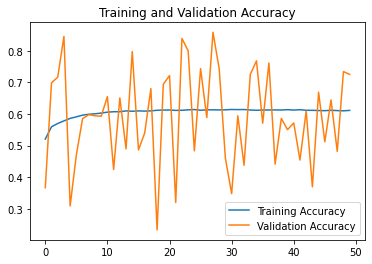

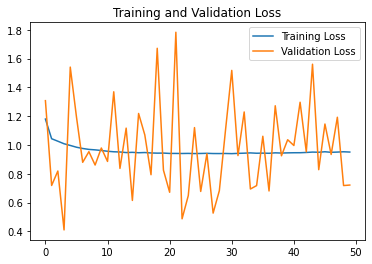

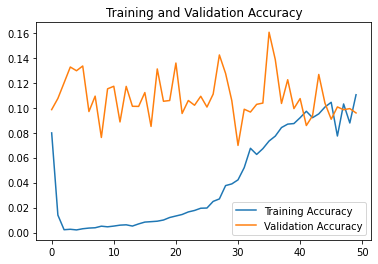

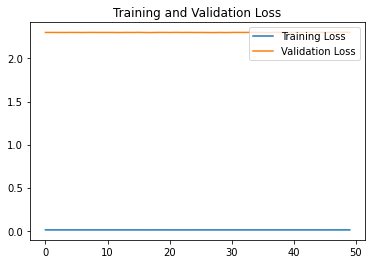

In [ ]:
# show result of 4 Rotation prediction classes
acc = history.history['rotation_categorical_accuracy']
val_acc = history.history['val_rotation_categorical_accuracy']

loss = history.history['rotation_loss']
val_loss = history.history['val_rotation_loss']

epochs_range = range((len(acc)))


plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



# show result of 10 Cifar classes
acc = history.history['class_categorical_accuracy']
val_acc = history.history['val_class_categorical_accuracy']

loss = history.history['class_loss']
val_loss = history.history['val_class_loss']

epochs_range = range((len(acc)))

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## loss_weights={'rotation': 0.1, 'cifar_class': 0.8}

In [ ]:
input_shape = tf.keras.layers.Input((32,32,3))
# input_shape = tf.keras.layers.Input(X_train[0].shape)

# define regularization norm 2
reg = keras.regularizers.l2(0.01)

# create the base model
# First convolutional layer
x = tf.keras.layers.Conv2D(128, (3, 3), kernel_regularizer=reg,)(input_shape)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(0.5)(x)

# Second convolutional layer
x = tf.keras.layers.Conv2D(128, (3, 3), kernel_regularizer=reg,)(input_shape)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(0.5)(x)

# Third convolutional layer
x = tf.keras.layers.Conv2D(128, (3, 3), kernel_regularizer=reg,)(input_shape)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(0.5)(x)


# add a Flatten layer
x = tf.keras.layers.Flatten()(x)

# let's add fully-connected layers
x = tf.keras.layers.Dense(1024, kernel_regularizer=reg)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(128, kernel_regularizer=reg)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
output = tf.keras.layers.Dropout(0.5)(x)

# 1
# output of 4 Rotation prediction classes [0, 90, 180, 270] degrees
rotation_output = tf.keras.layers.Dense(units=4, activation='softmax', name='rotation', kernel_regularizer=reg)(output)

# 2
# output of 10 Cifar classes
class_output = tf.keras.layers.Dense(units=10, activation='softmax', name='class', kernel_regularizer=reg)(output)


model = tf.keras.models.Model(inputs=input_shape, outputs=[rotation_output, class_output])
# model.summary()

# compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.008),
              loss={'rotation':  keras.losses.CategoricalCrossentropy(),'class': keras.losses.CategoricalCrossentropy()},
              metrics={'rotation':  keras.metrics.CategoricalAccuracy(),'class': keras.metrics.CategoricalAccuracy()},
              loss_weights={'rotation': 0.1, 'class': 0.8})

In [ ]:
history_2 = model.fit(my_training_batch_generator,
                    validation_data = (my_validation_batch_generator),
                    steps_per_epoch = int(200000 // batch_size),
                    validation_steps = int(10000 // batch_size),
                    epochs = 20)

Epoch 1/20
390/390 [==============================] - 32s 79ms/step - loss: 61.3911 - rotation_loss: 1.4923 - class_loss: 0.0107 - rotation_categorical_accuracy: 0.2770 - class_categorical_accuracy: 0.0803 - val_loss: 371.1100 - val_rotation_loss: 0.0000e+00 - val_class_loss: 2.3590 - val_rotation_categorical_accuracy: 1.0000 - val_class_categorical_accuracy: 0.1120
Epoch 2/20
390/390 [==============================] - 30s 78ms/step - loss: 564.1441 - rotation_loss: 1.6420 - class_loss: 0.0147 - rotation_categorical_accuracy: 0.2533 - class_categorical_accuracy: 0.0927 - val_loss: 1280.6029 - val_rotation_loss: 0.0000e+00 - val_class_loss: 2.3439 - val_rotation_categorical_accuracy: 0.0000e+00 - val_class_categorical_accuracy: 0.0995
Epoch 3/20
390/390 [==============================] - 30s 78ms/step - loss: 1601.6705 - rotation_loss: 2.6622 - class_loss: 0.0121 - rotation_categorical_accuracy: 0.2526 - class_categorical_accuracy: 0.0894 - val_loss: 2620.6775 - val_rotation_loss: 0.000

## loss_weights={'rotation': 0.01, 'cifar_class': 1}

In [ ]:
input_shape = tf.keras.layers.Input((32,32,3))
# input_shape = tf.keras.layers.Input(X_train[0].shape)

# define regularization norm 2
reg = keras.regularizers.l2(0.01)

# create the base model
# First convolutional layer
x = tf.keras.layers.Conv2D(128, (3, 3), kernel_regularizer=reg,)(input_shape)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(0.5)(x)

# Second convolutional layer
x = tf.keras.layers.Conv2D(128, (3, 3), kernel_regularizer=reg,)(input_shape)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(0.5)(x)

# Third convolutional layer
x = tf.keras.layers.Conv2D(128, (3, 3), kernel_regularizer=reg,)(input_shape)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(0.5)(x)


# add a Flatten layer
x = tf.keras.layers.Flatten()(x)

# let's add fully-connected layers
x = tf.keras.layers.Dense(1024, kernel_regularizer=reg)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(128, kernel_regularizer=reg)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
output = tf.keras.layers.Dropout(0.5)(x)

# 1
# output of 4 Rotation prediction classes [0, 90, 180, 270] degrees
rotation_output = tf.keras.layers.Dense(units=4, activation='softmax', name='rotation', kernel_regularizer=reg)(output)

# 2
# output of 10 Cifar classes
class_output = tf.keras.layers.Dense(units=10, activation='softmax', name='class', kernel_regularizer=reg)(output)


model = tf.keras.models.Model(inputs=input_shape, outputs=[rotation_output, class_output])
# model.summary()

# compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.008),
              loss={'rotation':  keras.losses.CategoricalCrossentropy(),'class': keras.losses.CategoricalCrossentropy()},
              metrics={'rotation':  keras.metrics.CategoricalAccuracy(),'class': keras.metrics.CategoricalAccuracy()},
              loss_weights={'rotation': 0.01, 'class': 1})

In [ ]:
history_3 = model.fit(my_training_batch_generator,
                    validation_data = (my_validation_batch_generator),
                    steps_per_epoch = int(200000 // batch_size),
                    validation_steps = int(10000 // batch_size),
                    epochs = 20)

Epoch 1/20
390/390 [==============================] - 32s 78ms/step - loss: 66.1527 - rotation_loss: 1.4849 - class_loss: 0.0119 - rotation_categorical_accuracy: 0.2654 - class_categorical_accuracy: 0.0650 - val_loss: 389.8590 - val_rotation_loss: 0.0000e+00 - val_class_loss: 2.9667 - val_rotation_categorical_accuracy: 0.6743 - val_class_categorical_accuracy: 0.1081
Epoch 2/20
390/390 [==============================] - 30s 77ms/step - loss: 595.7326 - rotation_loss: 1.6461 - class_loss: 0.0132 - rotation_categorical_accuracy: 0.2548 - class_categorical_accuracy: 0.0796 - val_loss: 1329.4703 - val_rotation_loss: 0.0000e+00 - val_class_loss: 2.3583 - val_rotation_categorical_accuracy: 0.0000e+00 - val_class_categorical_accuracy: 0.0926
Epoch 3/20
390/390 [==============================] - 30s 77ms/step - loss: 1643.1824 - rotation_loss: 2.1535 - class_loss: 0.0139 - rotation_categorical_accuracy: 0.2517 - class_categorical_accuracy: 0.0806 - val_loss: 2674.8860 - val_rotation_loss: 0.000

## loss_weights={'rotation': 0.3, 'class': 0.7}

In [ ]:
input_shape = tf.keras.layers.Input((32,32,3))
# input_shape = tf.keras.layers.Input(X_train[0].shape)

# define regularization norm 2
reg = keras.regularizers.l2(0.01)

# create the base model
# First convolutional layer
x = tf.keras.layers.Conv2D(128, (3, 3), kernel_regularizer=reg,)(input_shape)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(0.5)(x)

# Second convolutional layer
x = tf.keras.layers.Conv2D(128, (3, 3), kernel_regularizer=reg,)(input_shape)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(0.5)(x)

# Third convolutional layer
x = tf.keras.layers.Conv2D(128, (3, 3), kernel_regularizer=reg,)(input_shape)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Dropout(0.5)(x)


# add a Flatten layer
x = tf.keras.layers.Flatten()(x)

# let's add fully-connected layers
x = tf.keras.layers.Dense(1024, kernel_regularizer=reg)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(128, kernel_regularizer=reg)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
output = tf.keras.layers.Dropout(0.5)(x)

# 1
# output of 4 Rotation prediction classes [0, 90, 180, 270] degrees
rotation_output = tf.keras.layers.Dense(units=4, activation='softmax', name='rotation', kernel_regularizer=reg)(output)

# 2
# output of 10 Cifar classes
class_output = tf.keras.layers.Dense(units=10, activation='softmax', name='class', kernel_regularizer=reg)(output)


model = tf.keras.models.Model(inputs=input_shape, outputs=[rotation_output, class_output])
# model.summary()

# compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.008),
              loss={'rotation':  keras.losses.CategoricalCrossentropy(),'class': keras.losses.CategoricalCrossentropy()},
              metrics={'rotation':  keras.metrics.CategoricalAccuracy(),'class': keras.metrics.CategoricalAccuracy()},
              loss_weights={'rotation': 0.3, 'class': 0.7})

In [ ]:
history_4 = model.fit(my_training_batch_generator,
                    validation_data = (my_validation_batch_generator),
                    steps_per_epoch = int(200000 // batch_size),
                    validation_steps = int(10000 // batch_size),
                    epochs = 20)

Epoch 1/20
390/390 [==============================] - 64s 77ms/step - loss: 58.1496 - rotation_loss: 1.4697 - class_loss: 0.0105 - rotation_categorical_accuracy: 0.3047 - class_categorical_accuracy: 0.0761 - val_loss: 365.5601 - val_rotation_loss: 0.0000e+00 - val_class_loss: 2.4553 - val_rotation_categorical_accuracy: 0.0000e+00 - val_class_categorical_accuracy: 0.1055
Epoch 2/20
390/390 [==============================] - 29s 75ms/step - loss: 569.5083 - rotation_loss: 1.6526 - class_loss: 0.0136 - rotation_categorical_accuracy: 0.2550 - class_categorical_accuracy: 0.0869 - val_loss: 1303.7145 - val_rotation_loss: 0.0000e+00 - val_class_loss: 2.3333 - val_rotation_categorical_accuracy: 1.0000 - val_class_categorical_accuracy: 0.0922
Epoch 3/20
390/390 [==============================] - 29s 75ms/step - loss: 1607.6588 - rotation_loss: 2.0542 - class_loss: 0.0129 - rotation_categorical_accuracy: 0.2494 - class_categorical_accuracy: 0.0843 - val_loss: 2579.7051 - val_rotation_loss: 0.000